# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import requests

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# Save config information & query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
# Create empty lists
city_name = []
country = []
lat = []
lng = []
temp = []
humidity = []
clouds = []
wind = []

count = 0

In [5]:
# Loop for data request
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp"])
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        print(f'Processing Record: {count} {response["name"]}')
    except:
        print("city not found")
    count += 1
    
print("----------------------\nComplete")

Processing Record: 0 Tiksi
Processing Record: 1 Pantai Remis
Processing Record: 2 Hobart
Processing Record: 3 Tautira
Processing Record: 4 Voyvozh
Processing Record: 5 San Isidro
Processing Record: 6 Dikson
Processing Record: 7 Clyde River
Processing Record: 8 Borda da Mata
Processing Record: 9 Bengkulu
Processing Record: 10 Kysyl-Syr
Processing Record: 11 Ushuaia
city not found
Processing Record: 13 Upernavik
Processing Record: 14 Kapaa
Processing Record: 15 Yellowknife
city not found
Processing Record: 17 Souillac
Processing Record: 18 Bom Jardim
Processing Record: 19 Touros
Processing Record: 20 Umba
Processing Record: 21 Pisco
Processing Record: 22 Chui
Processing Record: 23 Butaritari
Processing Record: 24 Vrangel'
Processing Record: 25 Severo-Kuril'sk
Processing Record: 26 Rikitea
Processing Record: 27 Punta Arenas
Processing Record: 28 Amahai
Processing Record: 29 Saint-Philippe
Processing Record: 30 Castro
Processing Record: 31 Aksu
Processing Record: 32 Hithadhoo
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create dictionary for dataframe
weather_dict = {
    "City": city_name,
    "Country": country,
    "Latitude": lat,
    "Longitude": lng,
    "Temperature": temp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind
}

In [7]:
# Convert to dataframe
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Tiksi,RU,71.69,128.87,-11.13,88,28,6.17
1,Pantai Remis,MY,4.46,100.63,77.00,94,20,2.24
2,Hobart,AU,-42.88,147.33,75.79,43,0,11.41
3,Tautira,PF,-17.73,-149.15,82.40,69,40,14.99
4,Voyvozh,RU,62.89,54.96,22.21,99,100,4.27


In [8]:
# Export to CSV
weather_df.to_csv('output_data/weather_data.csv',index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# Check to see if there is humidity > 100%
weather_df.describe()

,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
count,572.000000,572.000000,572.00000,572.000000,572.000000,572.000000
mean,20.997867,15.656538,55.76236,75.732517,48.625874,7.883584
std,32.949699,87.634958,22.60558,18.594958,41.223833,5.927261
min,-54.800000,-175.200000,-25.24000,15.000000,0.000000,0.180000
25%,-7.027500,-57.575000,40.12750,66.000000,0.000000,3.447500
50%,27.445000,21.345000,59.79000,79.500000,44.500000,6.710000
75%,47.470000,85.677500,75.20000,90.000000,90.000000,10.562500
max,78.220000,179.320000,95.00000,100.000000,100.000000,40.260000


In [28]:
high_humidity_cities = weather_df.loc[weather_df["Humidity"] > 100]
high_humidity_cities

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed


In [11]:
# This data does not include any cities with humidity > 100% --> skipping

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

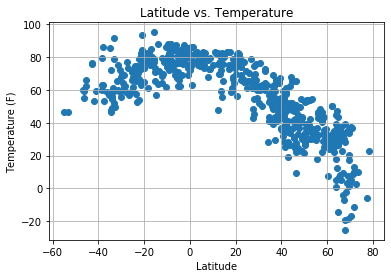

In [12]:
plt.scatter(weather_df["Latitude"], weather_df["Temperature"])
plt.title("Latitude vs. Temperature")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("output_data/lat_vs_temp.png")

## Latitude vs. Humidity Plot

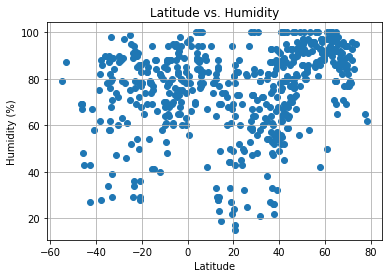

In [13]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"])
plt.title("Latitude vs. Humidity")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/lat_vs_humid.png")

## Latitude vs. Cloudiness Plot

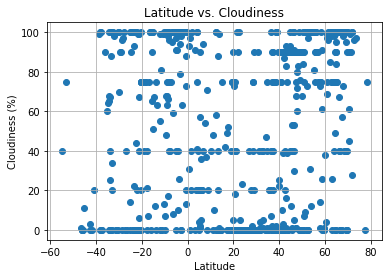

In [14]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"])
plt.title("Latitude vs. Cloudiness")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/lat_vs_clouds.png")

## Latitude vs. Wind Speed Plot

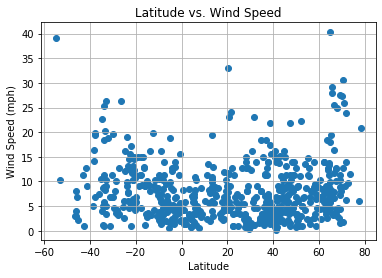

In [15]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"])
plt.title("Latitude vs. Wind Speed")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/lat_vs_winds.png")

## Linear Regression

In [16]:
# Create Northern and Southern Hemisphere DataFrames
north_hem = weather_df.loc[weather_df["Latitude"] >= 0]
south_hem = weather_df.loc[weather_df["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation of latitude to maximum temperature for a city in the northern hemisphere is -0.86059
The r-squared is 0.74061


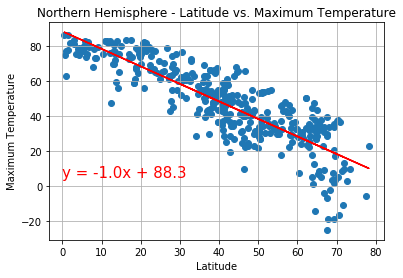

In [17]:
x_values = north_hem["Latitude"]
y_values = north_hem["Temperature"]
correlation = north_hem["Latitude"].corr(north_hem["Temperature"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.title("Northern Hemisphere - Latitude vs. Maximum Temperature")
plt.grid()
print(f"The correlation of latitude to maximum temperature for a city in the northern hemisphere is {round(correlation, 5)}")
print(f"The r-squared is {round(rvalue**2, 5)}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation of latitude to maximum temperature for a city in the southern hemisphere is 0.6
The r-squared is 0.36


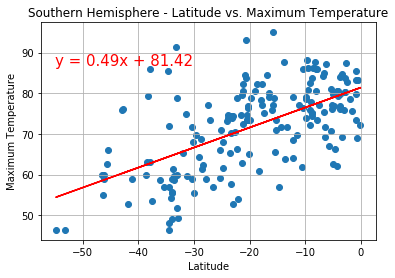

In [18]:
x_values = south_hem["Latitude"]
y_values = south_hem["Temperature"]
correlation = south_hem["Latitude"].corr(south_hem["Temperature"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,87),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.title("Southern Hemisphere - Latitude vs. Maximum Temperature")
plt.grid()
print(f"The correlation of latitude to maximum temperature for a city in the southern hemisphere is {round(correlation, 5)}")
print(f"The r-squared is {round(rvalue**2, 5)}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation of latitude to humidity for a city in the northern hemisphere is 0.36816
The r-squared is 0.13554


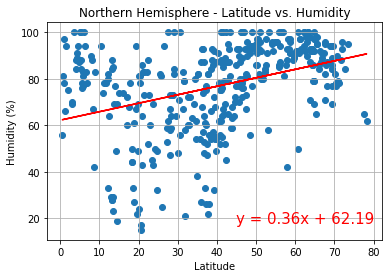

In [19]:
x_values = north_hem["Latitude"]
y_values = north_hem["Humidity"]
correlation = north_hem["Latitude"].corr(north_hem["Humidity"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,18),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Latitude vs. Humidity")
plt.grid()
print(f"The correlation of latitude to humidity for a city in the northern hemisphere is {round(correlation, 5)}")
print(f"The r-squared is {round(rvalue**2, 5)}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation of latitude to humidity for a city in the southern hemisphere is 0.1932
The r-squared is 0.03732


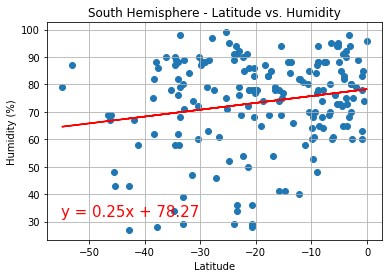

In [20]:
x_values = south_hem["Latitude"]
y_values = south_hem["Humidity"]
correlation = south_hem["Latitude"].corr(south_hem["Humidity"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,32),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("South Hemisphere - Latitude vs. Humidity")
plt.grid()
print(f"The correlation of latitude to humidity for a city in the southern hemisphere is {round(correlation, 5)}")
print(f"The r-squared is {round(rvalue**2, 5)}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation of latitude to cloudiness for a city in the northern hemisphere is 0.33428
The r-squared is 0.11174


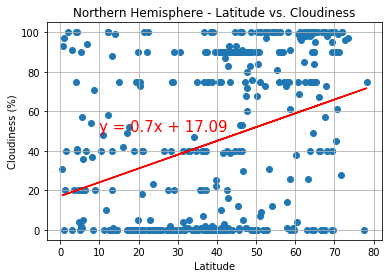

In [21]:
x_values = north_hem["Latitude"]
y_values = north_hem["Cloudiness"]
correlation = north_hem["Latitude"].corr(north_hem["Cloudiness"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Latitude vs. Cloudiness")
plt.grid()
print(f"The correlation of latitude to cloudiness for a city in the northern hemisphere is {round(correlation, 5)}")
print(f"The r-squared is {round(rvalue**2, 5)}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation of latitude to cloudiness for a city in the southern hemisphere is 0.31912
The r-squared is 0.10184


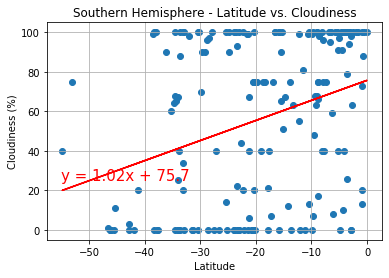

In [22]:
x_values = south_hem["Latitude"]
y_values = south_hem["Cloudiness"]
correlation = south_hem["Latitude"].corr(south_hem["Cloudiness"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Latitude vs. Cloudiness")
plt.grid()
print(f"The correlation of latitude to cloudiness for a city in the southern hemisphere is {round(correlation, 5)}")
print(f"The r-squared is {round(rvalue**2, 5)}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation of latitude to wind speed for a city in the northern hemisphere is 0.23556
The r-squared is 0.05549


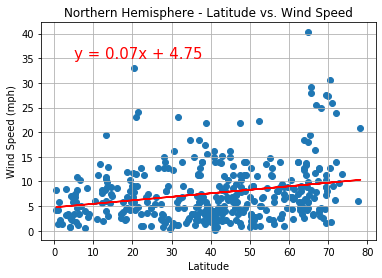

In [23]:
x_values = north_hem["Latitude"]
y_values = north_hem["Wind Speed"]
correlation = north_hem["Latitude"].corr(north_hem["Wind Speed"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,35),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Latitude vs. Wind Speed")
plt.grid()
print(f"The correlation of latitude to wind speed for a city in the northern hemisphere is {round(correlation, 5)}")
print(f"The r-squared is {round(rvalue**2, 5)}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation of latitude to wind speed for a city in the southern hemisphere is -0.28428
The r-squared is 0.08082


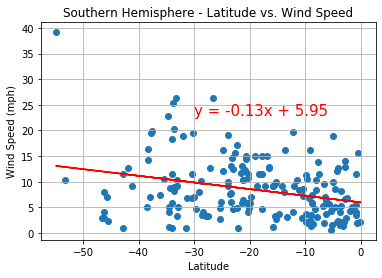

In [24]:
x_values = south_hem["Latitude"]
y_values = south_hem["Wind Speed"]
correlation = south_hem["Latitude"].corr(south_hem["Wind Speed"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,23),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Latitude vs. Wind Speed")
plt.grid()
print(f"The correlation of latitude to wind speed for a city in the southern hemisphere is {round(correlation, 5)}")
print(f"The r-squared is {round(rvalue**2, 5)}")
plt.show()

## Observations

In [25]:
# 1) Latitude and Maximum temperature do appear to have a relationship (Negative relationship in the Northern Hemisphere,
#    positive relationship in the southern hemisphere)

In [26]:
# 2) Based on the sample cities, the Northern Hemisphere appears to have a stronger relationship to temperature than the 
#    Southern Hemisphere. In the Northern Hemisphere, there is a correlation of ~-0.86, vs. a correlation of ~0.69 
#    in the Southern Hemisphere. 

In [27]:
# 3) Humidity, Cloudiness, and Wind Speed do not have a strong relationship with Latitude - correlations are not stronger
#    than +/- 0.34 for any of these factors.